# Example of sampling of the models with discrete variables

In [5]:
%load_ext autoreload
%autoreload 2
import pymc4 as pm
import arviz as az

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Bernoulli

In [2]:
@pm.model
def bernoulli():
    var1 = yield pm.Bernoulli("var1", 0.2)
    var2 = yield pm.Bernoulli("var2", 0.5)
    var3 = yield pm.Bernoulli("var3", 0.8)

In [3]:
trace = pm.sample(bernoulli(), sampler_type="compound") 
# after the review default attribute should be compound and if there is no
# discrete variable in the model, we choose nuts as the sampler

W0731 05:28:32.093909 140664198072128 deprecation.py:506] From /home/rasul/Desktop/forks/gsoc/discrete/pymc4/fork/pymc4/pymc4/mcmc/tf_support.py:32: calling RandomWalkMetropolis.__init__ (from tensorflow_probability.python.mcmc.random_walk_metropolis) with seed is deprecated and will be removed after 2020-09-20.
Instructions for updating:
The `seed` argument is deprecated (but will work until removed). Pass seed to `tfp.mcmc.sample_chain` instead.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fee70734860>,
      dtype=object)

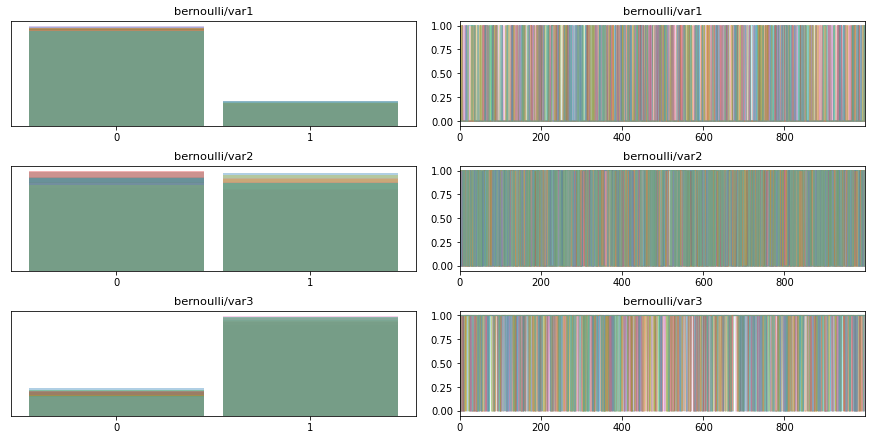

In [4]:
az.plot_trace(trace)

## Categorical

In [5]:
@pm.model
def categorical():
    var1 = yield pm.Categorical("var1", probs=[0.2, 0.4, 0.4])
    var1 = yield pm.Categorical("var2", probs=[0.1, 0.3, 0.2, 0.2, 0.2])
    var1 = yield pm.Categorical("var3", probs=[0.1, 0.1, 0.1, 0.1, 0.1, 0.5])

In [6]:
trace = pm.sample(categorical(), sampler_type="compound") 
# after the review default attribute should be compound and if there is no
# discrete variable in the model, we choose nuts as the sampler

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fee70443320>,
      dtype=object)

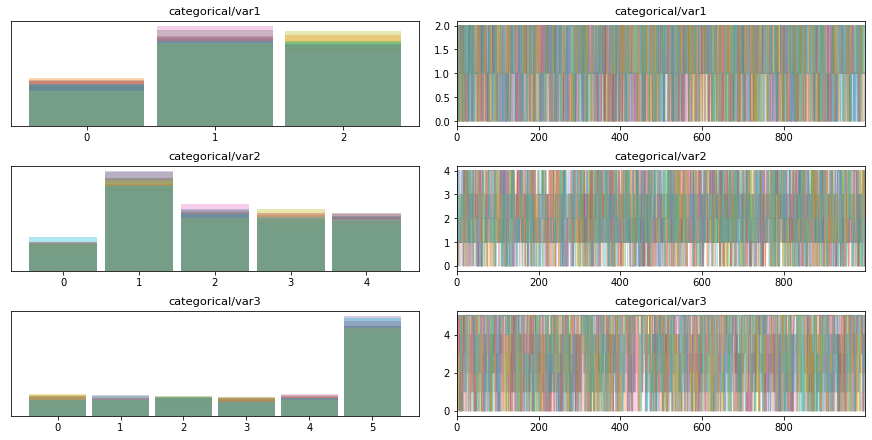

In [7]:
az.plot_trace(trace)

## Poisson

In [6]:
from pymc4.distributions.state_functions import gaussian_round_fn
from pymc4.mcmc.samplers import RandomWalkM

@pm.model
def model():
    var1 = yield pm.Poisson("var1", 1)
    var2 = yield pm.Poisson("var2", 1)

In [7]:
trace = pm.sample(model(), 
                  sampler_type="compound", 
                  sampler_methods=[("var1", RandomWalkM, {"new_state_fn": gaussian_round_fn})])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f846856d320>,
      dtype=object)

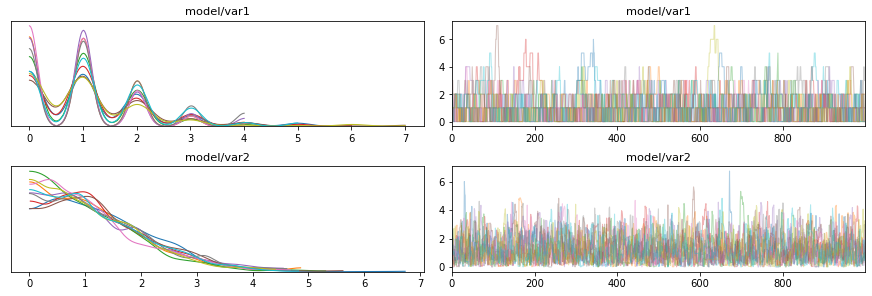

In [8]:
az.plot_trace(trace)